In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist
import math
from math import ceil


# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [16]:
#读取数据
data1 = pd.read_csv("C:/Users/Administrator/动手学/data/records-for-2011.csv")
data2 = pd.read_csv("C:/Users/Administrator/动手学/data/records-for-2012.csv")
data3 = pd.read_csv("C:/Users/Administrator/动手学/data/records-for-2013.csv")
data4 = pd.read_csv("C:/Users/Administrator/动手学/data/records-for-2014.csv")
data5 = pd.read_csv("C:/Users/Administrator/动手学/data/records-for-2015.csv")
data6 = pd.read_csv("C:/Users/Administrator/动手学/data/records-for-2016.csv")

In [17]:
data = [data1,data2,data3,data4,data5,data6]

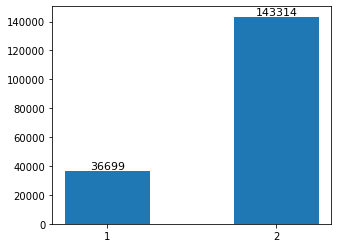

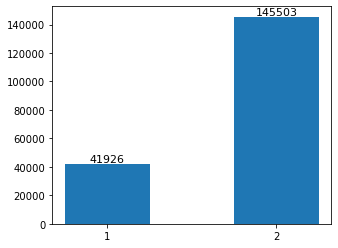

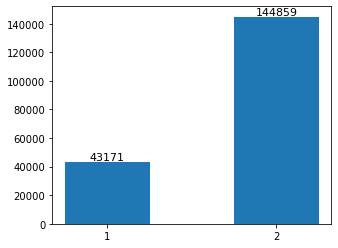

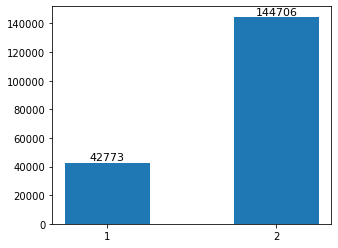

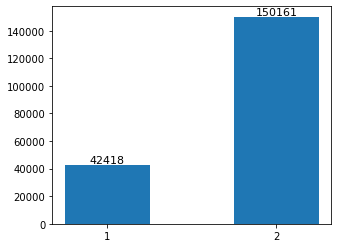

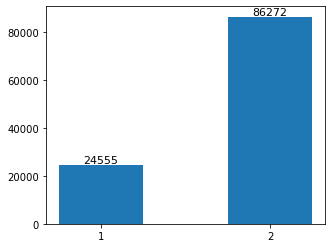

In [18]:
data_all=data
year=2011
count=0
for data in data_all:
    data.drop([len(data)-1],inplace=True)
    data_priority=data["Priority"]
    priority1=data_priority.loc[data_priority.isin([1])]
    priority2=data_priority.loc[data_priority.isin([2])]
    index=[1,2]
    values=[priority1.sum(),priority2.sum()/2]

    plt.figure(figsize=(5,4))
  
    plt.bar(index,values, 0.5, label="num")
    plt.xticks(index)
    for a,b in zip(index,values):  
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
    year=year+1

In [19]:
#填充缺失值
#首先分析哪些属性有空值
year1=[2011,2012,2013,2014,2015,2016]

datatype1=[data1,data2,data3,data4,data5,data6]

count=0
for data in datatype1:
    data_add=data
    data_add=data_add.dropna(axis=0,how='all')
    data1_list=["Agency","Create Time","Area Id","Beat","Priority","Incident Type Id","Incident Type Description","Event Number","Closed Time"]
    print(str(year1[count])+"数据库有缺失的属性值有:")
    for data_list in data1_list:
        data_add_g=data_add[data_add[data_list].isnull()]
        if(len(data_add_g)>0):
            print(data_list)
    count+=1

2011数据库有缺失的属性值有:
Area Id
Beat
Closed Time
2012数据库有缺失的属性值有:
Area Id
Beat
Closed Time
2013数据库有缺失的属性值有:
Area Id
Beat
Incident Type Description
Closed Time
2014数据库有缺失的属性值有:
Area Id
Beat
Incident Type Description
2015数据库有缺失的属性值有:
Beat
Incident Type Description
2016数据库有缺失的属性值有:
Beat


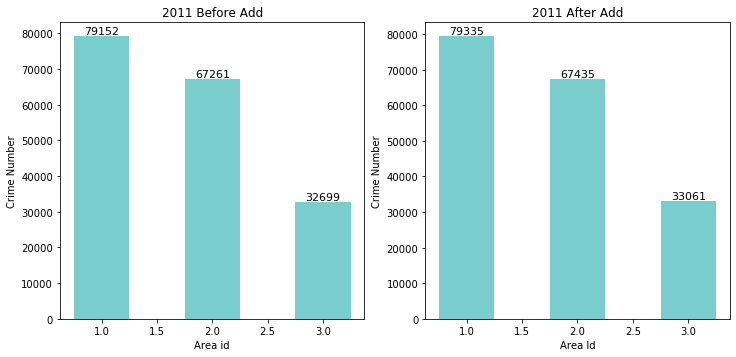

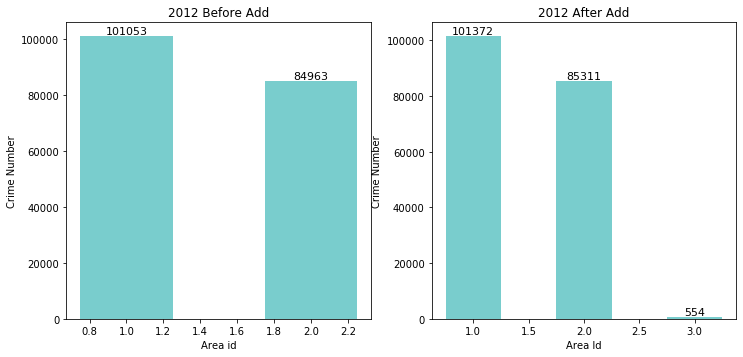

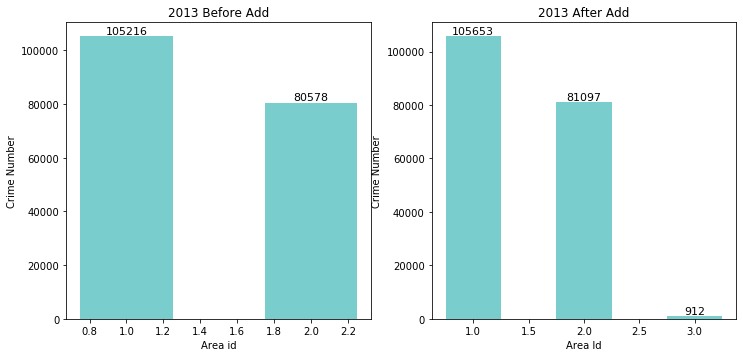

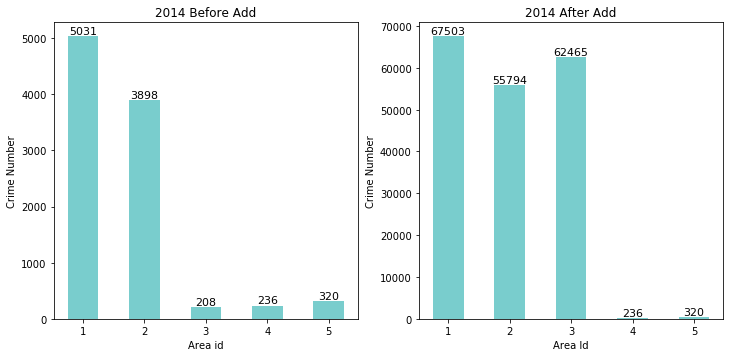

In [23]:
import math

year=2011
data_all=[data1,data2,data3,data4]
for data in data_all:
    data_D1=data[["Area Id","Beat"]]#原始数据
    data_D1=data_D1.dropna(axis=0,how="all")
    data_D1_values=data_D1.values
    data_D1_values_original=data_D1.values

    data_f=data1[["Area Id","Beat"]].dropna(axis=0,how="any")#数据字典
    data_f=data_f.drop_duplicates()
    data_f=data_f.drop_duplicates(subset=["Beat"])
    data_f=data_f.values

    for i in range(len(data_D1_values)):
        if(math.isnan(data_D1_values[i][0])):
            for x in data_f:
                if(data_D1_values[i][1]==x[1]and(~math.isnan(x[0]))):
                    data_D1_values[i][0]=x[0]
                    break;

    data_D1_values_original = pd.DataFrame(data_D1_values_original)#原始data
    d2_1=data_D1_values_original[0].value_counts(sort=True)
    
    area_id_original=d2_1.index.tolist()
    d2_1=d2_1.values
    index = np.arange(len(d2_1))

    data_D1_values_add = pd.DataFrame(data_D1_values)#填充后结果
    d2_2=data_D1_values_add[0].value_counts(sort=True)
    area_id_add=d2_2.index.tolist()
    d2_2=d2_2.values
    index = np.arange(len(d2_2))


    plt.figure(figsize=(12,12))
    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,2)

    plt.sca(ax1)
    plt.bar(area_id_original,d2_1, 0.5,color='#79CDCD')

    for a,b in zip(area_id_original,d2_1):  
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
    plt.xlabel("Area id")  #设置X轴Y轴名称  
    plt.ylabel("Crime Number")  
    plt.title(str(year)+" Before Add")

    plt.sca(ax2)
    plt.bar(area_id_add,d2_2, 0.5,color='#79CDCD')
    for a,b in zip(area_id_add,d2_2):  
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
    plt.xlabel("Area Id")  #设置X轴Y轴名称  
    plt.ylabel("Crime Number")  
    plt.title(str(year)+" After Add")
    plt.show()
    year=year+1